In [58]:
import pandas as pnd
import seaborn as sb
import matplotlib.pyplot as plot
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from kneed import KneeLocator

data = pnd.read_csv('data/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [13]:
data.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [14]:
data.nlargest(20, ['income'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700


In [15]:
data.nsmallest(20, ['income'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


C:\Users\romac\AppData\Local\Temp\ipykernel_15332\1082686620.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelated = data.corr()


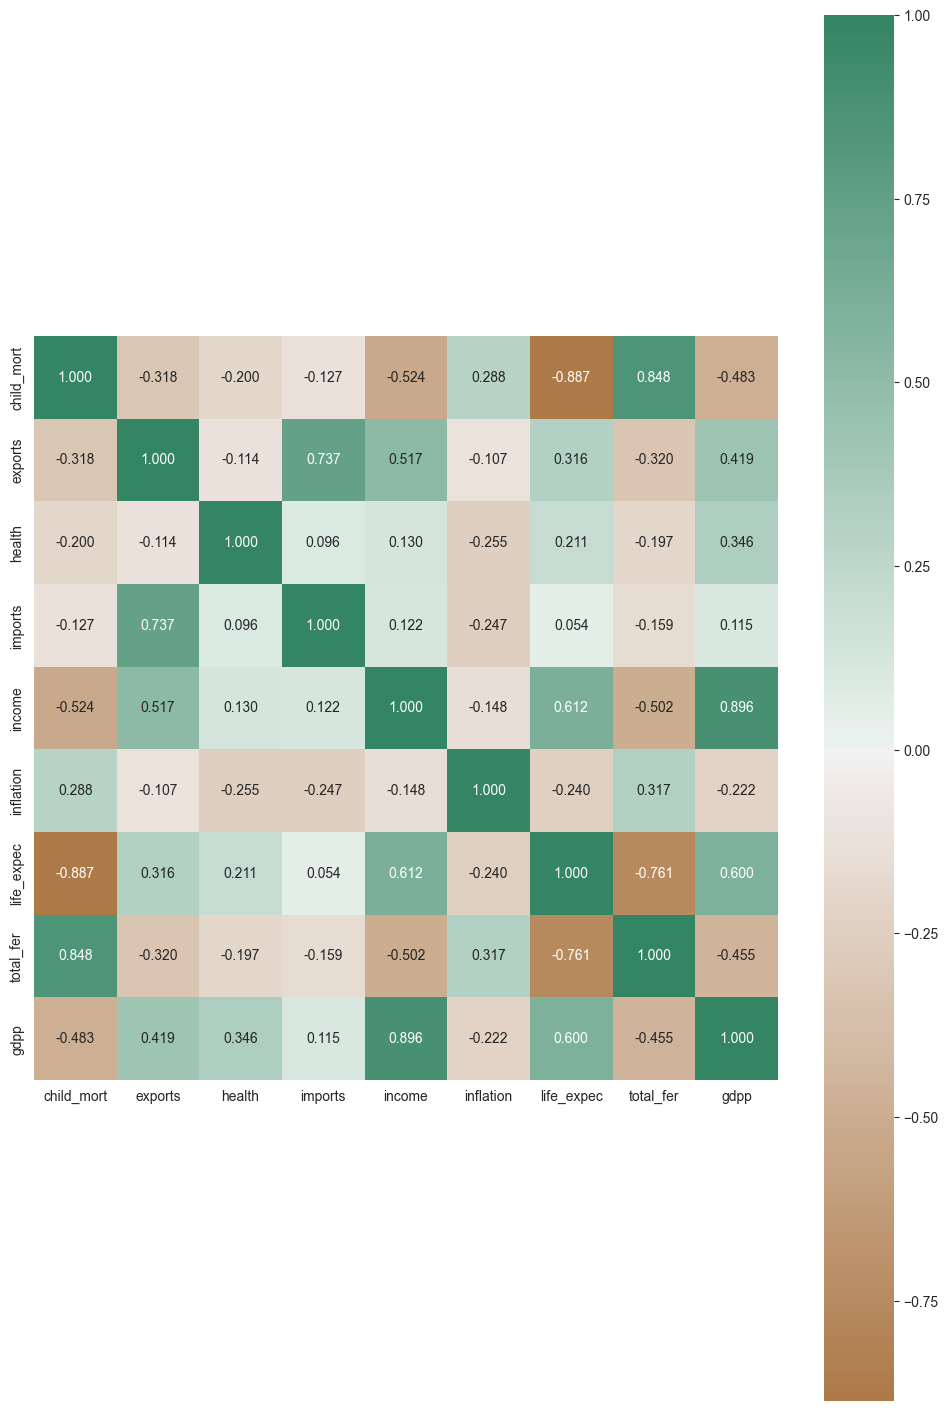

In [16]:
corelated = data.corr()
plot.figure(figsize=(12,18))
map = sb.diverging_palette(400, 150, s=80, l=50, n=10, center="light", as_cmap=True)
_ = sb.heatmap(corelated, center=0, annot=True, fmt='.3f', square=True, cmap=map)

In [17]:
print('Однофакторний аналіз')


Однофакторний аналіз


<AxesSubplot: xlabel='life_expec', ylabel='Count'>

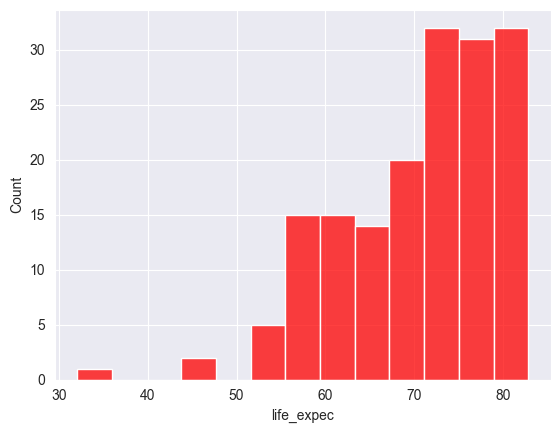

In [19]:
sb.histplot(data=data.dropna(subset=['life_expec']), x="life_expec", color="red")

<AxesSubplot: xlabel='income', ylabel='Count'>

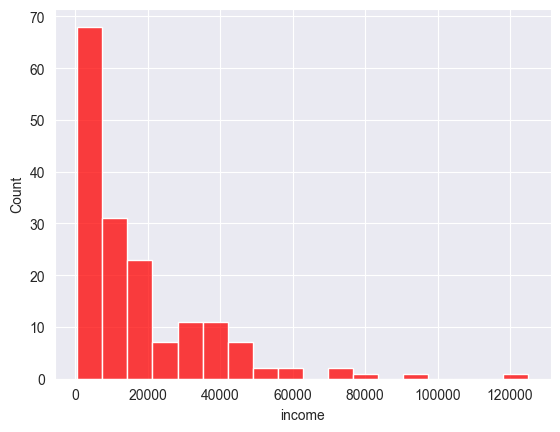

In [20]:
sb.histplot(data=data.dropna(subset=['income']), x="income", color="red")

<AxesSubplot: xlabel='gdpp'>

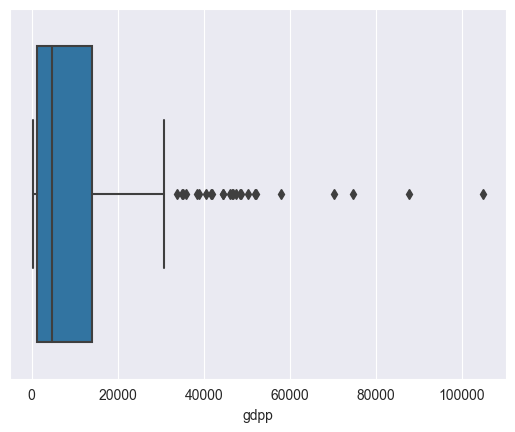

In [21]:
dataDropna = data.dropna(subset=['gdpp'])
sb.boxplot(x = dataDropna['gdpp'])

In [54]:
data.nsmallest(20, ['health', 'inflation'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440
70,Indonesia,33.3,24.300,2.61,22.4000,8430,15.30,69.9,2.48,3110
82,Kuwait,10.8,66.700,2.63,30.4000,75200,11.20,78.2,2.21,38500
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482
115,Oman,11.7,65.700,2.77,41.2000,45300,15.60,76.1,2.90,19300
23,Brunei,10.5,67.400,2.84,28.0000,80600,16.70,77.1,1.84,35300


Двофакторний аналіз


<AxesSubplot: xlabel='life_expec', ylabel='gdpp'>

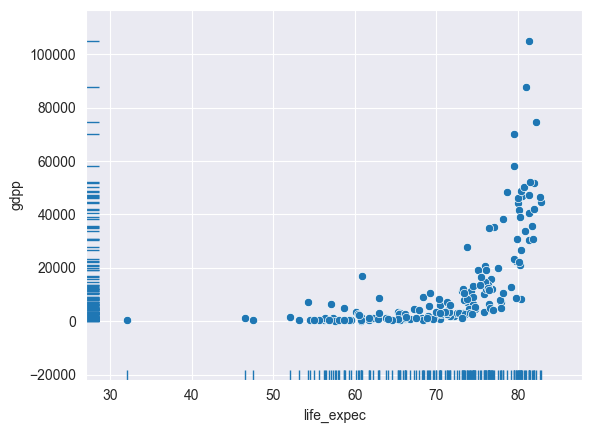

In [22]:
print('Двофакторний аналіз')

sb.scatterplot(data=data, x='life_expec', y ='gdpp')
sb.rugplot(data=data, x='life_expec', y ='gdpp')

Проаналізуємо викиди для income, health, inflation


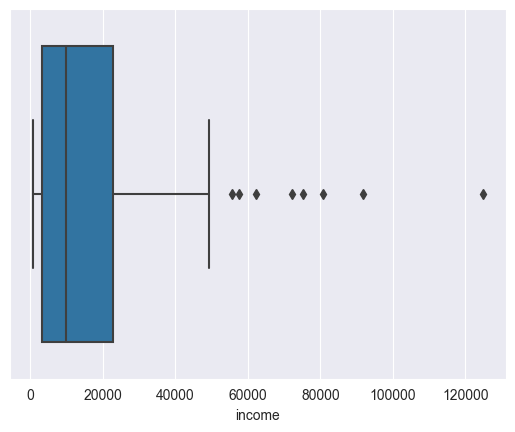

<class 'pandas.core.series.Series'>
RangeIndex: 167 entries, 0 to 166
Series name: income
Non-Null Count  Dtype
--------------  -----
167 non-null    int64
dtypes: int64(1)
memory usage: 1.4 KB


In [40]:
print('Проаналізуємо викиди для income, health, inflation')

sb.boxplot(x=data['income'])
plot.show()
data['income'].info()

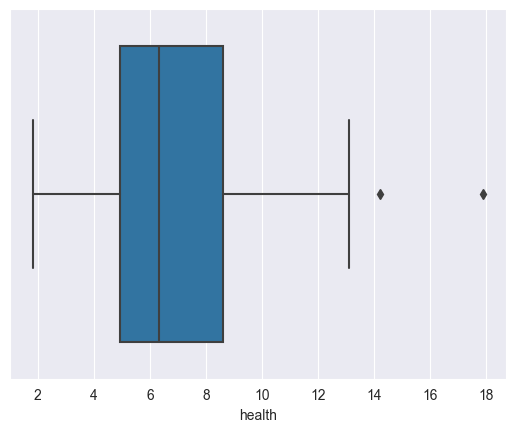

<class 'pandas.core.series.Series'>
RangeIndex: 167 entries, 0 to 166
Series name: health
Non-Null Count  Dtype  
--------------  -----  
167 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB


In [41]:
sb.boxplot(x=data['health'])
plot.show()
data['health'].info()

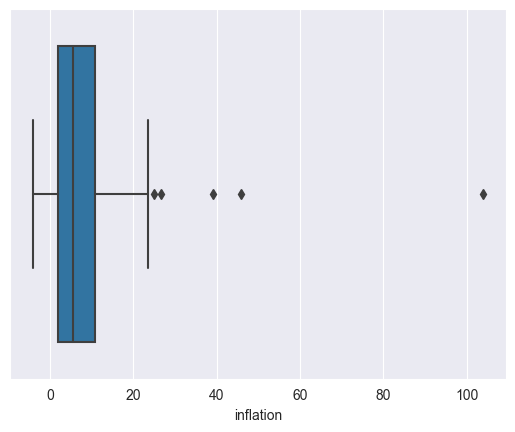

<class 'pandas.core.series.Series'>
RangeIndex: 167 entries, 0 to 166
Series name: inflation
Non-Null Count  Dtype  
--------------  -----  
167 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB


In [42]:
sb.boxplot(x=data['inflation'])
plot.show()
data['inflation'].info()

Використаємо K-mean для оптимізації


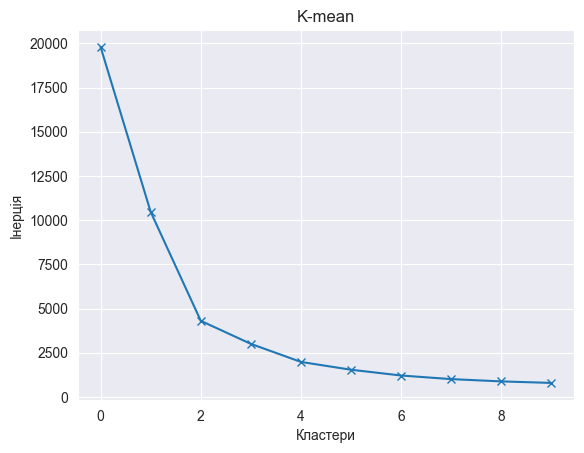

In [53]:
print('Використаємо K-mean для оптимізації')
dataLs = list(zip(data["health"], data["inflation"]))
summary = []

for i in range(1,11):
    mean = KMeans(n_clusters=i)

    mean.fit(dataLs)

    summary.append(mean.inertia_)

plot.title('K-mean')
plot.xlabel('Кластери')
plot.ylabel('Інерція')
plot.plot(range(0,10), summary, marker='x')

Оптимізуємо К


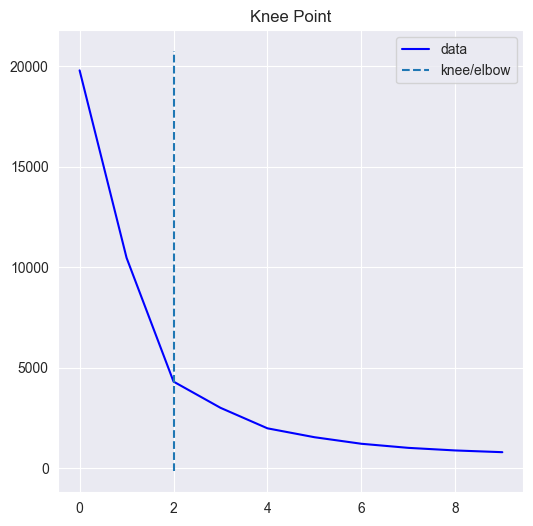

In [59]:
print('Оптимізуємо К')
optimized = KneeLocator(range(0, 10), summary, direction="decreasing", curve="convex")
optimized.plot_knee()

In [65]:
print('Проаналізyємо країни з найгіршими показниками')
data.nsmallest(20, ['health', 'inflation'])
print('Бачимо що за показниками health та inflation найкгірші у Мьанми, Конго та Пакистану')

Проаналізyємо країни з найгіршими показниками


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440
70,Indonesia,33.3,24.300,2.61,22.4000,8430,15.30,69.9,2.48,3110
82,Kuwait,10.8,66.700,2.63,30.4000,75200,11.20,78.2,2.21,38500
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482
115,Oman,11.7,65.700,2.77,41.2000,45300,15.60,76.1,2.90,19300
23,Brunei,10.5,67.400,2.84,28.0000,80600,16.70,77.1,1.84,35300
